In [49]:
import pandas as pd
import kaplanmeier as km
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sarc = pd.read_csv("sarcoma.csv")

myc = pd.read_csv("MYC.csv", sep="\t")
cdk = pd.read_csv("CDKN2A.csv", sep="\t")
erb = pd.read_csv("ERBB2.csv", sep="\t")
tp = pd.read_csv("TP53.csv", sep="\t")



/var/folders/qv/z21x1r6d63x1t_xq50d41088zgw87m/T/ipykernel_3355/197719092.py:4: DtypeWarning: Columns (2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  cdk = pd.read_csv("CDKN2A.csv", sep="\t")


In [3]:
mycl = []
cdkl = []
erbl = []
tpl = []


for yd in sarc.loc[:,"id"]:
    for yyd in myc.loc[:,"biosample_id"]:
        if yd == yyd:
            if yd not in mycl:
                mycl.append(yd)
    for yyd in cdk.loc[:,"biosample_id"]:
        if yd == yyd:
            if yd not in cdkl:
                cdkl.append(yd)
    for yyd in erb.loc[:,"biosample_id"]:
        if yd == yyd:
            if yd not in erbl:
                erbl.append(yd)
    for yyd in tp.loc[:,"biosample_id"]:
        if yd == yyd:
            if yd not in tpl:
                tpl.append(yd)


In [4]:
mycsarc = pd.DataFrame(sarc.loc[sarc["id"].isin(mycl)])
cdksarc = pd.DataFrame(sarc.loc[sarc["id"].isin(cdkl)])
erbsarc = pd.DataFrame(sarc.loc[sarc["id"].isin(erbl)])
tpsarc = pd.DataFrame(sarc.loc[sarc["id"].isin(tpl)])

In [5]:
mycsarc["label"] = "MYC+"
cdksarc["label"] = "CDKN2A-"
erbsarc["label"] = "ERBB2+"
tpsarc["label"] = "TP53-"

In [6]:
täglichbrot = pd.concat([mycsarc,cdksarc,erbsarc,tpsarc])

In [7]:
täglichbrot[täglichbrot["info.followupMonths"].isna()]

,_id,cohorts.0.id,cohorts.0.label,dataUseConditions.id,dataUseConditions.label,description,externalReferences.0.id,externalReferences.0.label,histologicalDiagnosis.id,histologicalDiagnosis.label,...,externalReferences.4.description,externalReferences.4.id,externalReferences.4.label,cohorts.4.id,cohorts.4.label,info.cellLine,info.samplesource,info.seer,sex,label
245,5bab56c9727983b2e00aef75,pgxcohort-2021progenetix,Version at Progenetix Update 2021,DUO:0000004,no restriction,Osteosarcoma [Osteoblastic],PMID:15305059,"Zielenska M, Marrano P et al. (2004): High-res...",NCIT:C9145,Osteosarcoma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,MYC+


In [8]:
täglichbrot = täglichbrot.drop([245])

In [12]:
täglichbrot.to_csv("täglichbrot.csv")

In [9]:
mycres = km.fit(täglichbrot.loc[:,"info.followupMonths"], täglichbrot.loc[:,"info.death"], täglichbrot.loc[:,"label"])

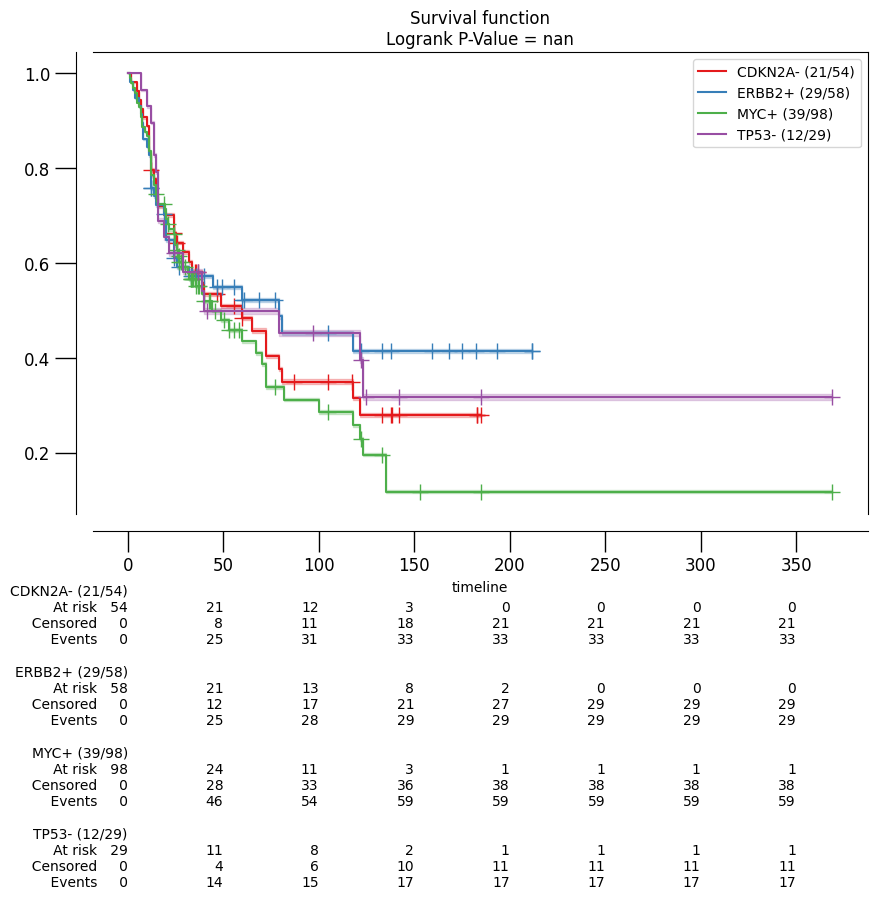

In [10]:
km.plot(mycres)

In [26]:
?plt.boxplot

In [28]:
cnvfraction = täglichbrot.loc[:,"info.cnvstatistics.cnvfraction"].tolist()
label = täglichbrot.loc[:,"label"].tolist()

<AxesSubplot: title={'center': 'info.cnvstatistics.cnvfraction'}, xlabel='label'>

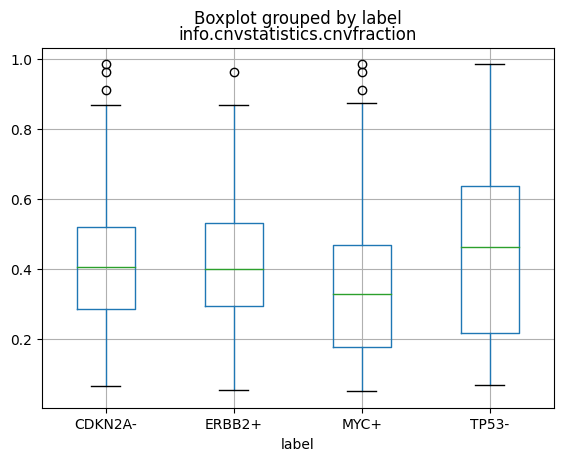

In [31]:
täglichbrot.boxplot(column="info.cnvstatistics.cnvfraction", by = "label")

<AxesSubplot: title={'center': 'info.cnvstatistics.cnvfraction'}, xlabel='histologicalDiagnosis.label'>

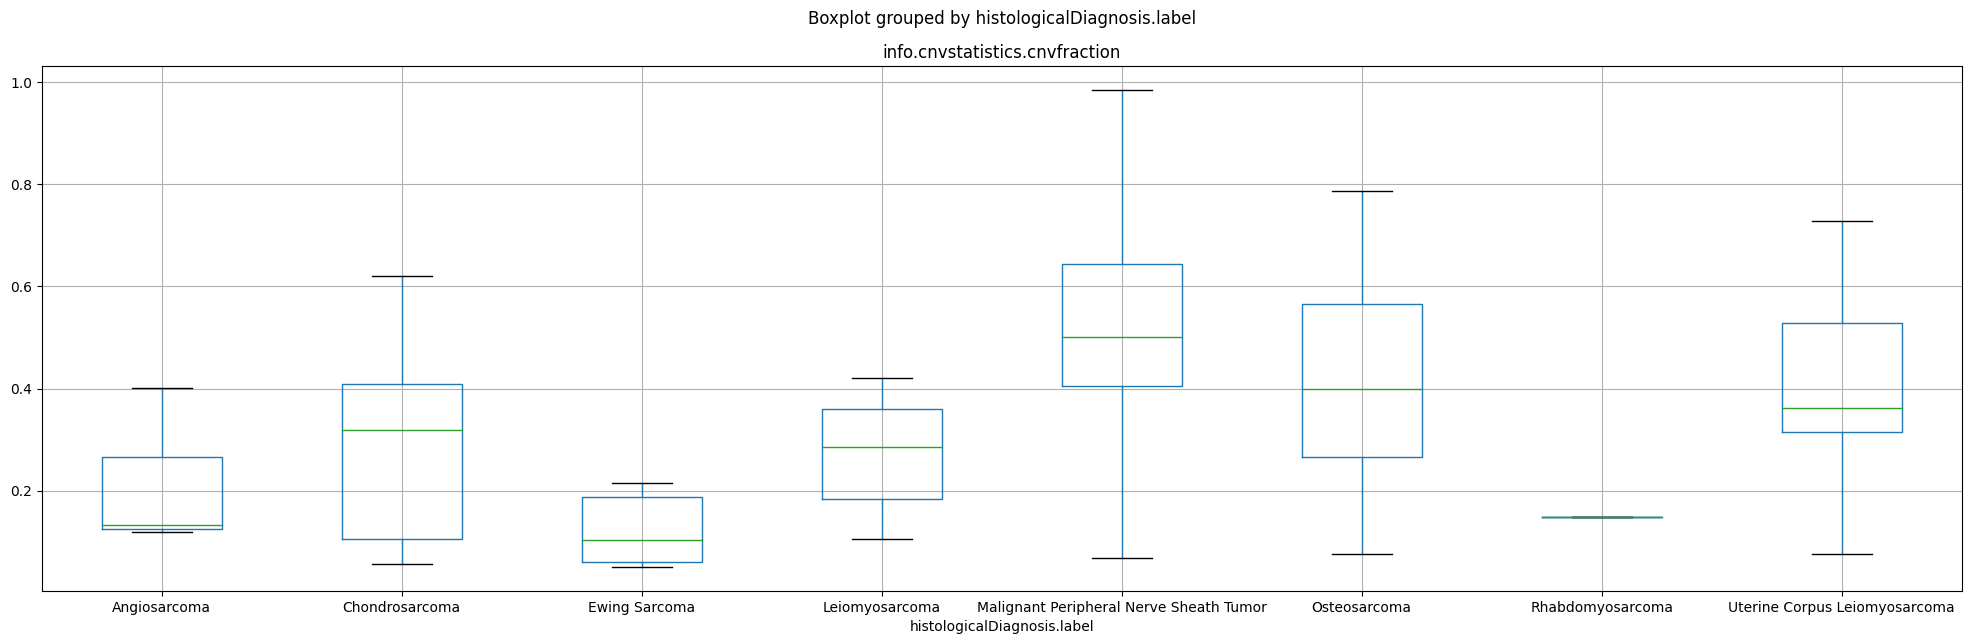

In [41]:
täglichbrot.boxplot(column="info.cnvstatistics.cnvfraction", by = "histologicalDiagnosis.label", figsize=(24,7))

<AxesSubplot: xlabel='histologicalDiagnosis.label', ylabel='info.cnvstatistics.cnvfraction'>

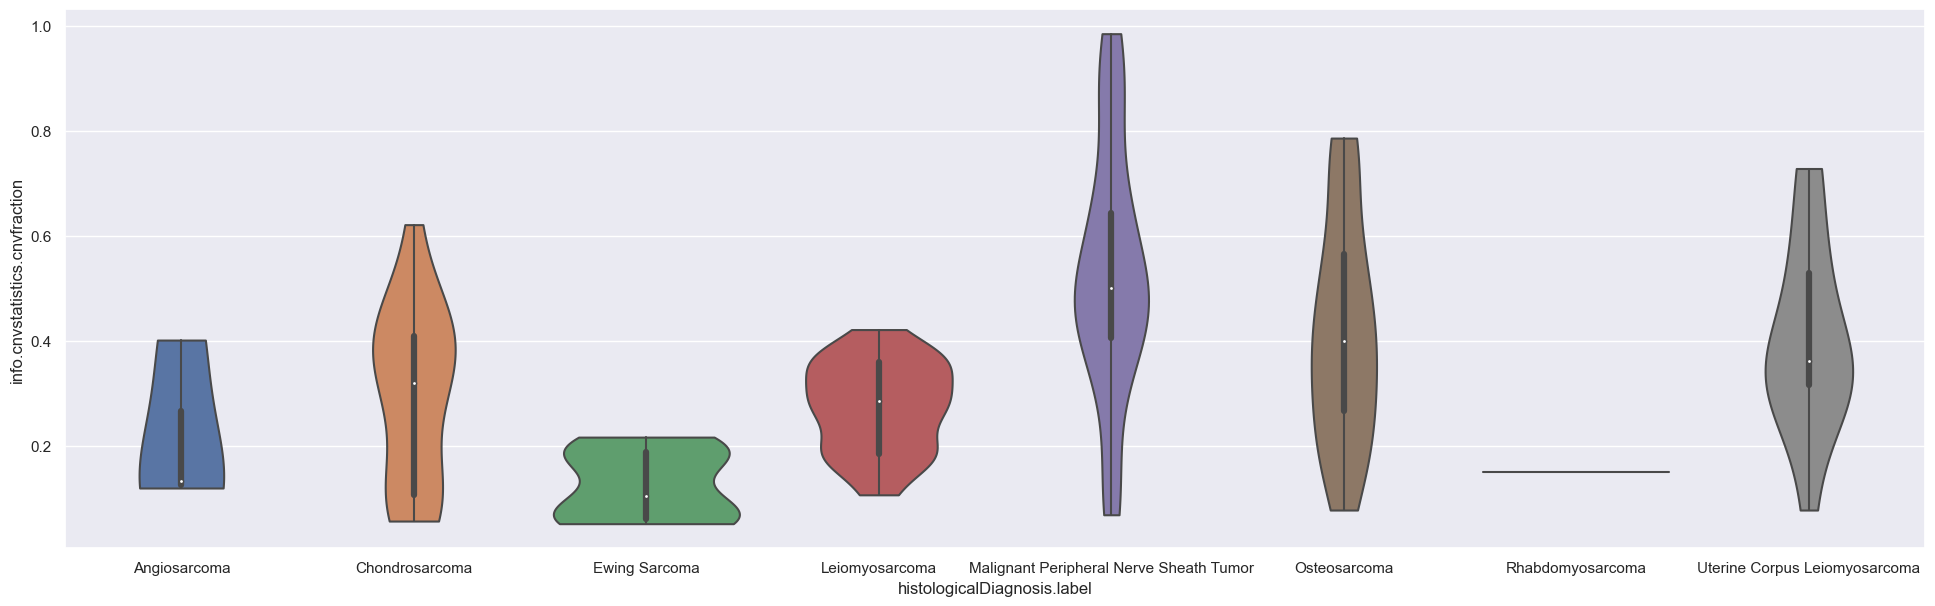

In [72]:
sns.set(rc={'figure.figsize':(24,7)})
sns.violinplot(data=täglichbrot, x="histologicalDiagnosis.label", y="info.cnvstatistics.cnvfraction", cut=0)

In [62]:
(täglichbrot.loc[:,"info.cnvstatistics.cnvfraction"] > 1).any()

False

In [63]:
max(täglichbrot.loc[:,"info.cnvstatistics.cnvfraction"])

0.985

# violinplot is very misleading, as it "draws data" where there are no values!
-> set cut=0

<AxesSubplot: xlabel='histologicalDiagnosis.label', ylabel='info.cnvstatistics.delfraction'>

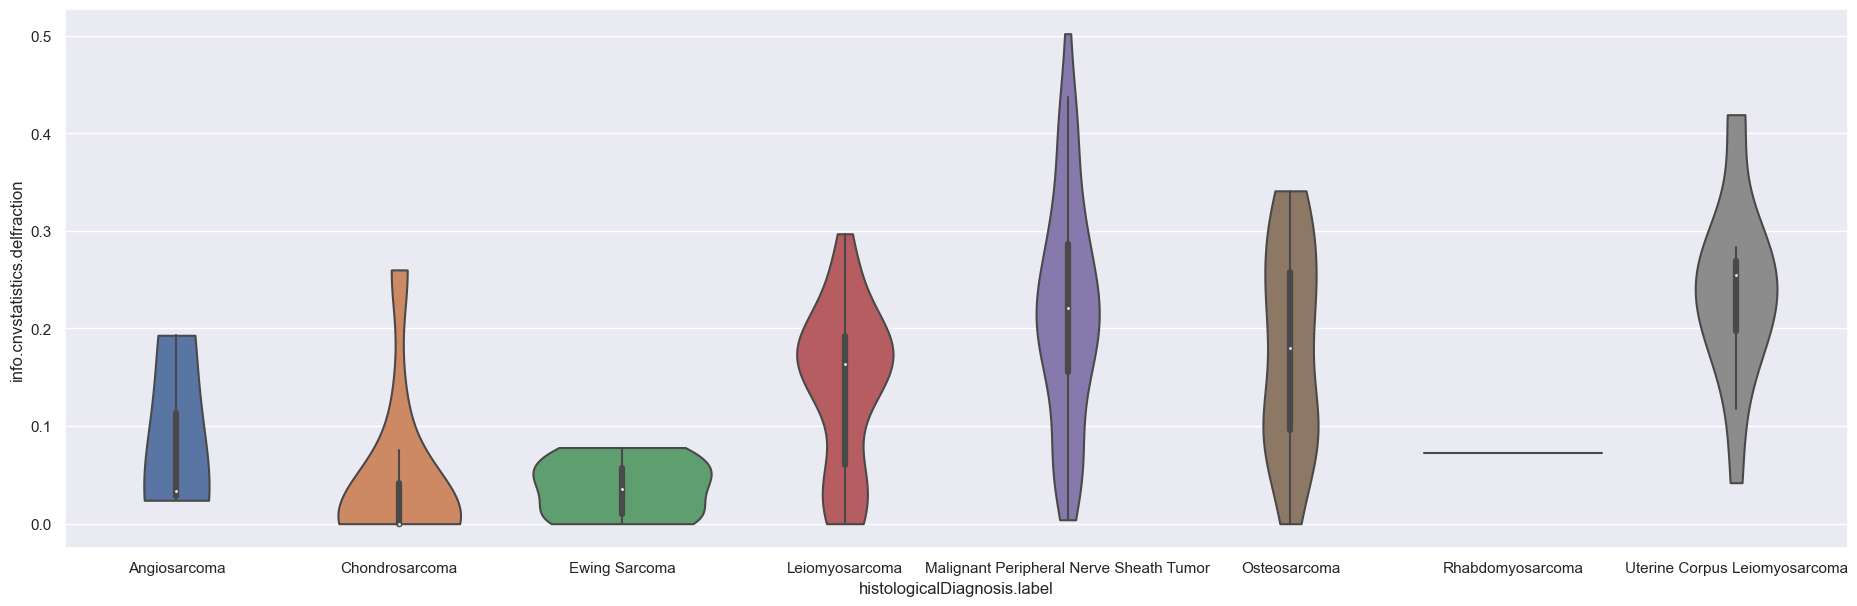

In [226]:
sns.set(rc={'figure.figsize':(23,7)})
sns.violinplot(data=täglichbrot, x="histologicalDiagnosis.label", y="info.cnvstatistics.delfraction", cut=0)

<AxesSubplot: xlabel='histologicalDiagnosis.label', ylabel='info.cnvstatistics.dupfraction'>

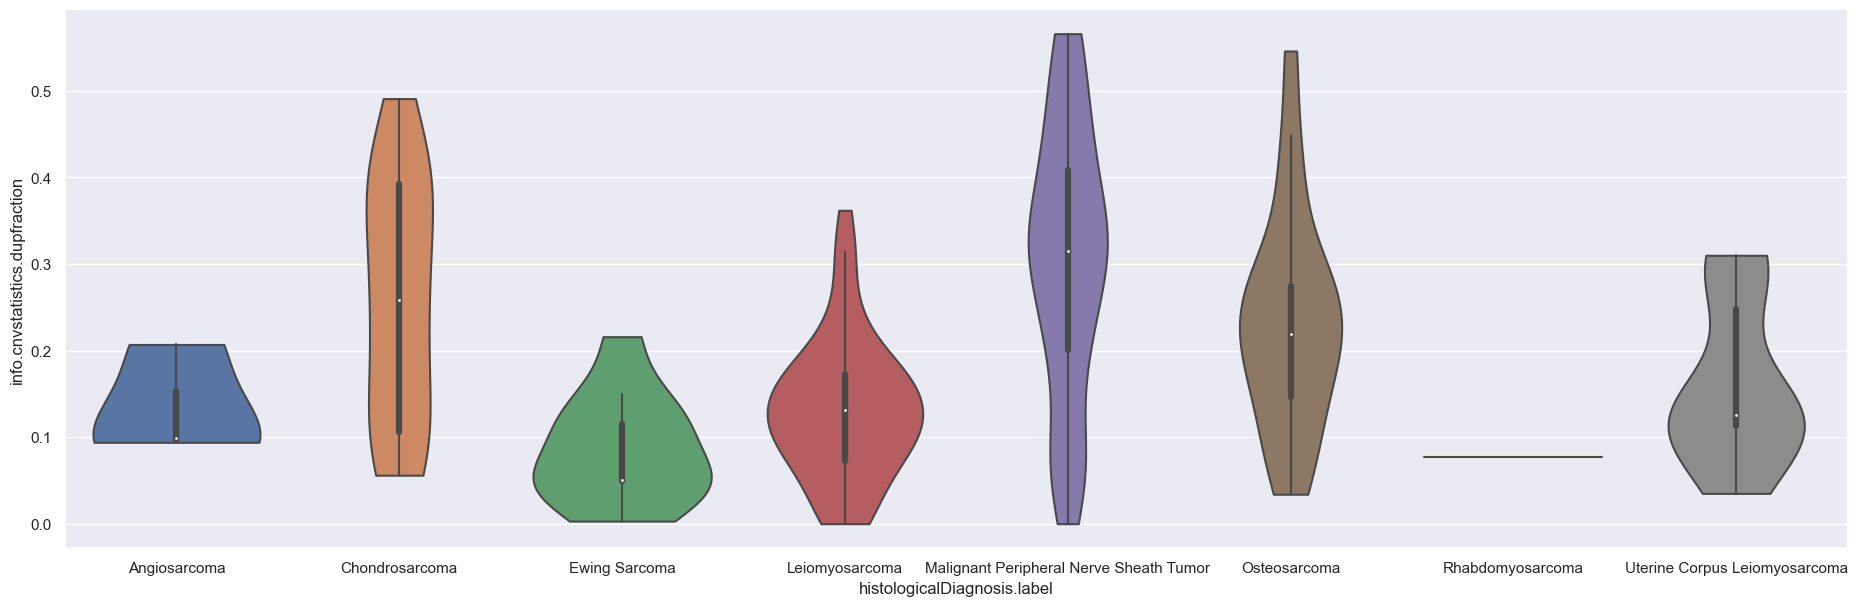

In [225]:
sns.set(rc={'figure.figsize':(23,7)})
sns.violinplot(data=täglichbrot, x="histologicalDiagnosis.label", y="info.cnvstatistics.dupfraction", cut=0)

In [101]:
reg = pd.DataFrame({"gene":täglichbrot.loc[:,"label"].tolist(), "diagnosis":täglichbrot.loc[:,"histologicalDiagnosis.label"].tolist()})

In [165]:
barpl = []
diagn = np.unique(reg["diagnosis"]).tolist()
genenames = np.unique(reg["gene"]).tolist()
                  
for diagnosis in diagn:
    barpl.append(reg[reg.diagnosis == diagnosis]["gene"].value_counts())
bardf = pd.DataFrame({"diagnosis":diagn, "genes":barpl})

In [219]:
counts = pd.DataFrame([[1,0,2,0], [2,8,10,0], [2,0,9,0], [15,18,16,2], [24,22,28,19], 
                       [6,7,26,5], [0,0,1,0], [4,3,6,3]], index=diagn)

counts.columns=genenames
counts

,CDKN2A-,ERBB2+,MYC+,TP53-
Angiosarcoma,1,0,2,0
Chondrosarcoma,2,8,10,0
Ewing Sarcoma,2,0,9,0
Leiomyosarcoma,15,18,16,2
Malignant Peripheral Nerve Sheath Tumor,24,22,28,19
Osteosarcoma,6,7,26,5
Rhabdomyosarcoma,0,0,1,0
Uterine Corpus Leiomyosarcoma,4,3,6,3


In [220]:
countsnorm = counts.div(counts.sum(axis=1), axis=0)
countsnorm

,CDKN2A-,ERBB2+,MYC+,TP53-
Angiosarcoma,0.333333,0.000000,0.666667,0.000000
Chondrosarcoma,0.100000,0.400000,0.500000,0.000000
Ewing Sarcoma,0.181818,0.000000,0.818182,0.000000
Leiomyosarcoma,0.294118,0.352941,0.313725,0.039216
Malignant Peripheral Nerve Sheath Tumor,0.258065,0.236559,0.301075,0.204301
Osteosarcoma,0.136364,0.159091,0.590909,0.113636
Rhabdomyosarcoma,0.000000,0.000000,1.000000,0.000000
Uterine Corpus Leiomyosarcoma,0.250000,0.187500,0.375000,0.187500


<AxesSubplot: >

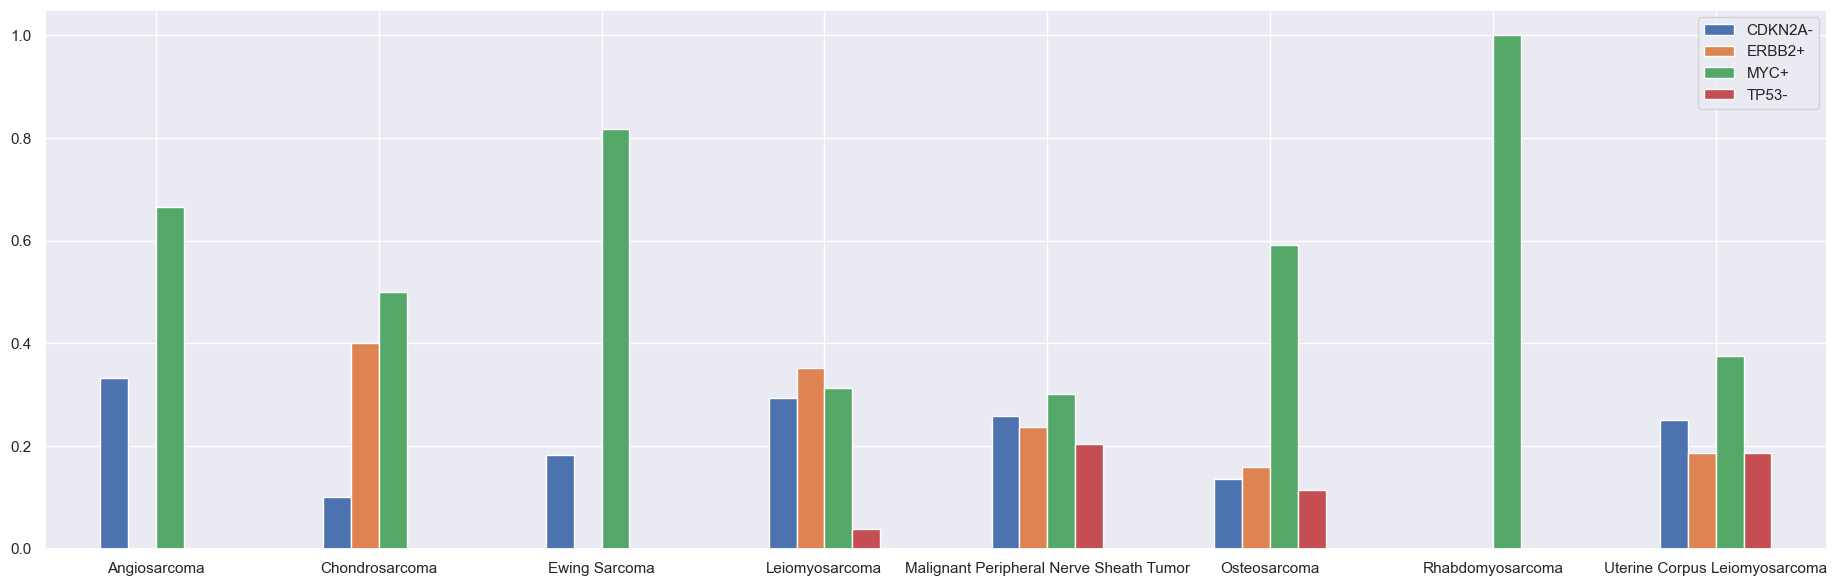

In [227]:
countsnorm.plot.bar(rot = 0)

<AxesSubplot: xlabel='sampledTissue.label', ylabel='info.cnvstatistics.cnvfraction'>

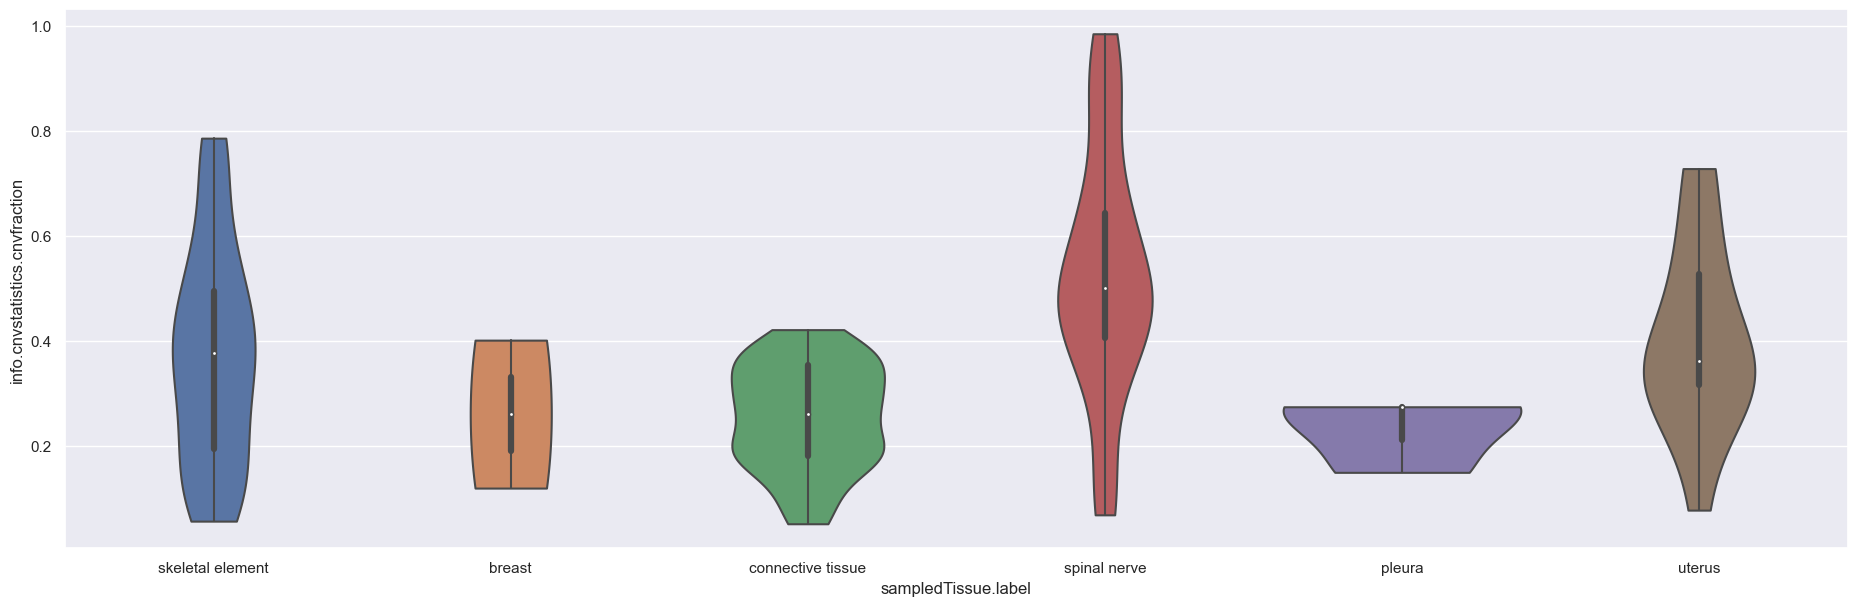

In [229]:
sns.violinplot(data=täglichbrot, x="sampledTissue.label", y="info.cnvstatistics.cnvfraction", cut=0)

<AxesSubplot: xlabel='sex', ylabel='info.cnvstatistics.cnvfraction'>

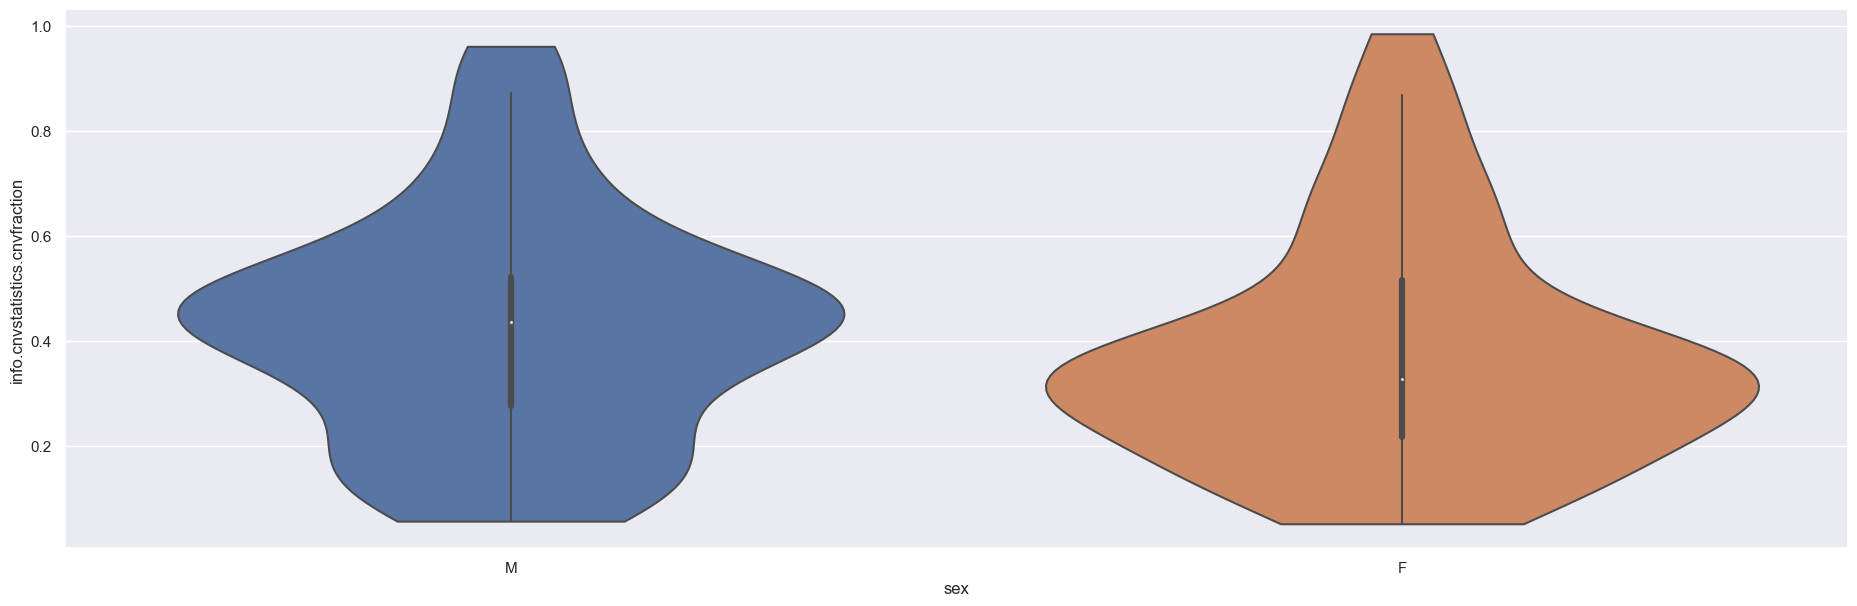

In [230]:
sns.violinplot(data=täglichbrot, x="sex", y="info.cnvstatistics.cnvfraction", cut=0)

<AxesSubplot: xlabel='provenance.geoLocation.properties.ISO3166alpha3', ylabel='info.cnvstatistics.cnvfraction'>

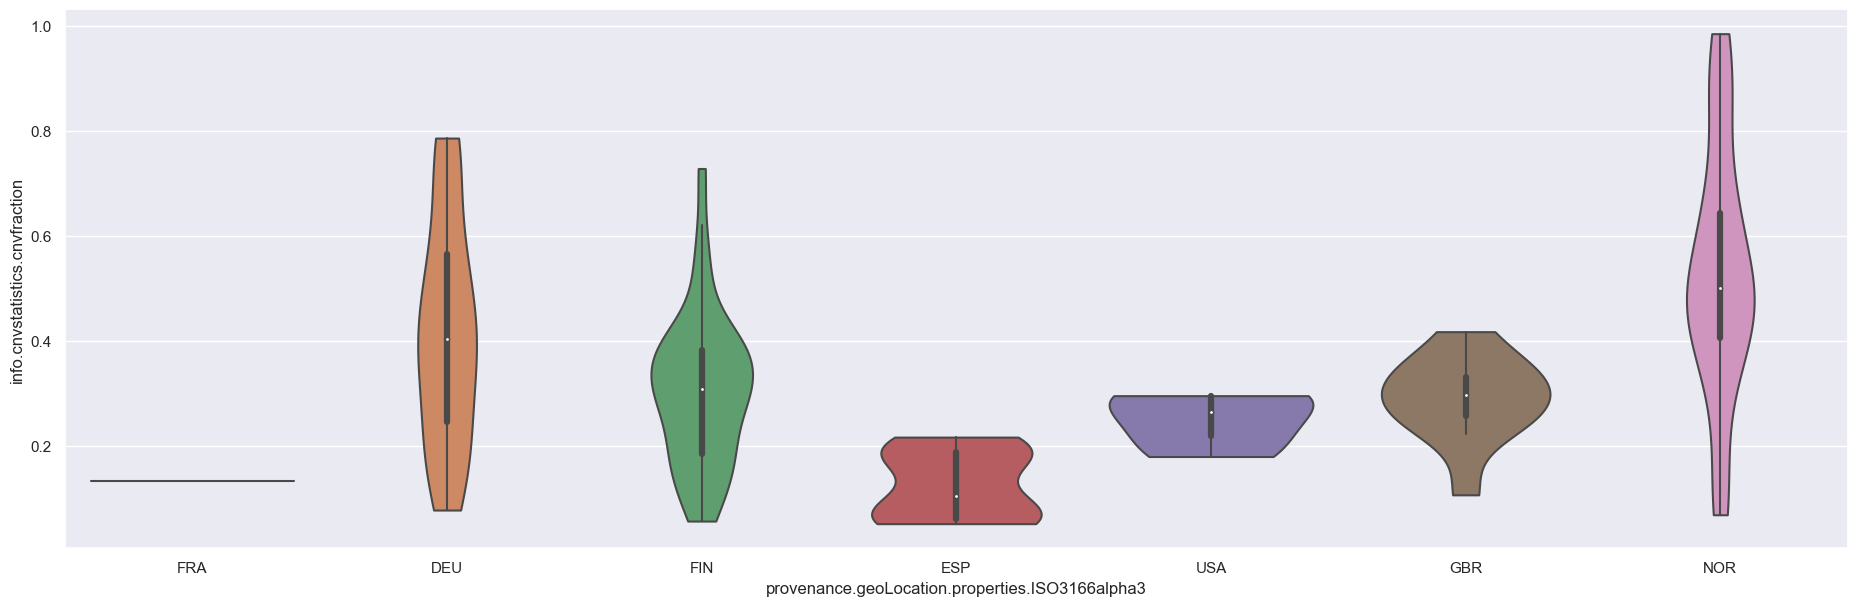

In [231]:
sns.violinplot(data=täglichbrot, x="provenance.geoLocation.properties.ISO3166alpha3", y="info.cnvstatistics.cnvfraction", cut=0)
